## Polytope Climate-DT Bounding Box example notebook

This notebook shows how to use earthkit-data and earthkit-plots to pull destination-earth data from LUMI and plot it using earthkit-plots.

Before running the notebook you need to set up your credentials. See the main readme of this repository for different ways to do this or use the following cells to authenticate.

You will need to generate your credentials using the desp-authentication.py script.

This can be run as follows:

In [ ]:
%%capture cap
%run ../desp-authentication.py

This will generate a token that can then be used by earthkit and polytope.

In [3]:
output_1 = cap.stdout.split('}\n')
access_token = output_1[-1][0:-1]

# Requirements
To run this notebook install the following:
* pip install earthkit-data
* pip install earthkit-plots
* pip install earthkit-regrid  (Optional for spectral variables)
* pip install cf-units         (Optional for unit conversion in maps)

If you do not have eccodes installed please install eccodes using conda as it is a dependency of earthkit, or install earthkit via conda

* conda install eccodes -c conda-forge
* conda install earthkit-data -c conda-forge

In [1]:
import earthkit.data
import earthkit.plots
from earthkit.regrid import interpolate
from polytope.api import Client

In [3]:
# Set True if you want to make a live request for the data, or false if you want to use the cached grib file
LIVE_REQUEST = True

In [4]:
request = {
    "activity": "scenariomip",
    "class": "d1",
    "dataset": "climate-dt",
    "experiment": "ssp3-7.0",
    "generation": "1",
    "levtype": "sfc",
    "date": "20210101",
    "model": "ifs-nemo",
    "expver": "0001",
    "param": "167/165",
    "realization": "1",
    "resolution": "high",
    "stream": "clte",
    "type": "fc",
    "time": "0000",
    "feature": {
        "type": "boundingbox",
        "points" : [[55.1, 5.9], [47.3, 15.0]],
    },
}

In [ ]:
data_file = "data/climate-dt-earthkit-fe-boundingbox.covjson"
if LIVE_REQUEST:
    data = earthkit.data.from_source("polytope", "destination-earth", request, address="polytope.lumi.apps.dte.destination-earth.eu", stream=False)
    data.to_target("file", data_file)
else:
    data = earthkit.data.from_source("file", data_file) 

In [6]:
ds = data.to_xarray()
ds

<xarray.Dataset> Size: 652kB
Dimensions:    (datetimes: 1, number: 1, steps: 1, points: 13574)
Coordinates:
  * datetimes  (datetimes) <U20 80B '2021-01-01T00:00:00Z'
  * number     (number) int64 8B 0
  * steps      (steps) int64 8B 0
  * points     (points) int64 109kB 0 1 2 3 4 ... 13569 13570 13571 13572 13573
    latitude   (points) float64 109kB 47.31 47.31 47.31 ... 55.06 55.06 55.06
    longitude  (points) float64 109kB 14.24 12.67 13.46 ... 13.69 13.8 13.57
    levelist   (points) float64 109kB 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0
Data variables:
    10u        (datetimes, number, steps, points) float64 109kB 2.093 ... 11.9
    2t         (datetimes, number, steps, points) float64 109kB 269.0 ... 279.4
Attributes: (12/16)
    activity:       scenariomip
    class:          d1
    dataset:        climate-dt
    Forecast date:  2021-01-01T00:00:00Z
    experiment:     ssp3-7.0
    expver:         0001
    ...             ...
    resolution:     high
    stream:         clte
    type:           fc
    number:         0
    step:           0
    date:           2021-01-01T00:00:00Z

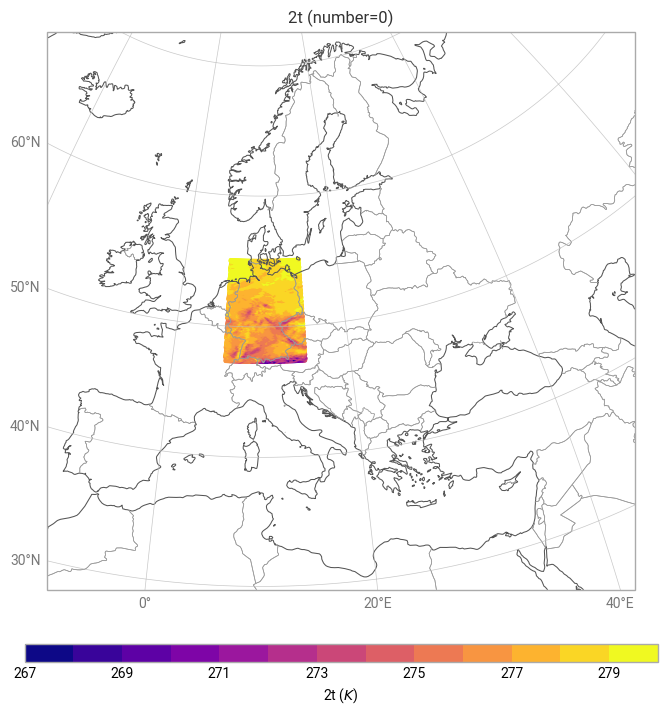

In [7]:
chart = earthkit.plots.Map(domain="Europe")
chart.point_cloud(ds['2t'], x="longitude", y="latitude")

chart.coastlines()
chart.borders()
chart.gridlines()

chart.title("{variable_name} (number={number})")

chart.legend()

chart.show()

In [9]:
from covjsonkit.api import Covjsonkit

cov = Covjsonkit().decode(data._json())
mp = cov.to_geotiff()


Extent: [5.900662251656, 15.000662251656, 47.300045049637, 55.060045049637]


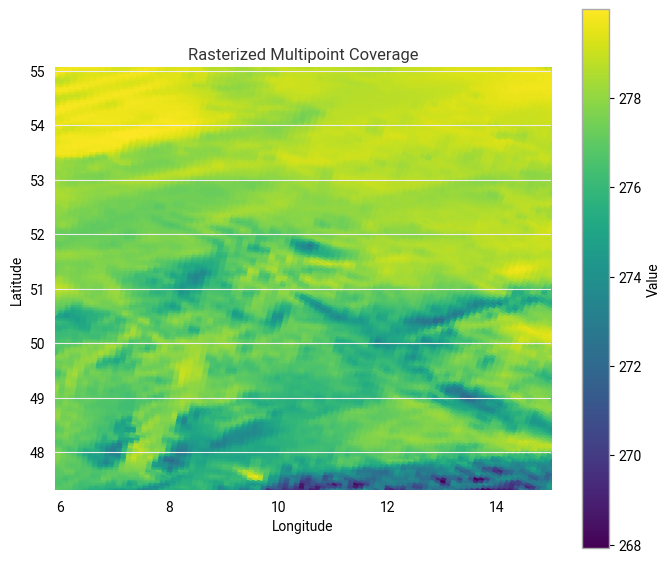

Band count: 1
Band 1: min=267.91541290283203, max=279.9843215942383


In [10]:
import rasterio
import matplotlib.pyplot as plt

with rasterio.open("multipoint_2t.tif") as src:
    data = src.read(1)
    extent = [src.bounds.left, src.bounds.right, src.bounds.bottom, src.bounds.top]

print("Extent:", extent)

plt.imshow(data, extent=extent, origin="upper", cmap="viridis")
plt.colorbar(label="Value")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("Rasterized Multipoint Coverage")
plt.savefig("multipoint_2t.png")
plt.show()

with rasterio.open("multipoint_2t.tif") as src:
    print("Band count:", src.count)
    for i in range(1, src.count + 1):
        arr = src.read(i)
        print(f"Band {i}: min={arr.min()}, max={arr.max()}")

In [2]:
request = {
    "activity": "scenariomip",
    "class": "d1",
    "dataset": "climate-dt",
    "experiment": "ssp3-7.0",
    "generation": "1",
    "levtype": "sfc",
    "date": "20210101",
    "model": "ifs-nemo",
    "expver": "0001",
    "param": "167/165",
    "realization": "1",
    "resolution": "high",
    "stream": "clte",
    "type": "fc",
    "time": "0000",
}

In [3]:
data = earthkit.data.from_source("polytope", "destination-earth", request, address="polytope.lumi.apps.dte.destination-earth.eu", stream=False)

2025-10-16 11:56:09 - INFO - Key read from /home/maaw/.polytopeapirc
2025-10-16 11:56:09 - INFO - Sending request...
{'request': 'activity: scenariomip\n'
            'class: d1\n'
            'dataset: climate-dt\n'
            "date: '20210101'\n"
            'experiment: ssp3-7.0\n'
            "expver: '0001'\n"
            "generation: '1'\n"
            'levtype: sfc\n'
            'model: ifs-nemo\n'
            'param: 167/165\n'
            "realization: '1'\n"
            'resolution: high\n'
            'stream: clte\n'
            "time: '0000'\n"
            'type: fc\n',
 'verb': 'retrieve'}
2025-10-16 11:56:09 - INFO - Polytope user key found in session cache for user maaw
2025-10-16 11:56:11 - INFO - Request accepted. Please poll ./aaf479de-e023-4a20-8cd2-280775b81193 for status
2025-10-16 11:56:11 - INFO - Polytope user key found in session cache for user maaw
2025-10-16 11:56:11 - INFO - Checking request status (./aaf479de-e023-4a20-8cd2-280775b81193)...
2025-10-16 11

aaf479de-e023-4a20-8cd2-280775b81193.grib:   0%|          | 0.00/52.9M [00:00<?, ?B/s]

In [4]:
data.ls()

,centre,shortName,typeOfLevel,level,dataDate,dataTime,stepRange,dataType,number,gridType
0,ecmf,2t,heightAboveGround,2,20210101,0,0,fc,None,healpix
1,ecmf,10u,heightAboveGround,10,20210101,0,0,fc,None,healpix


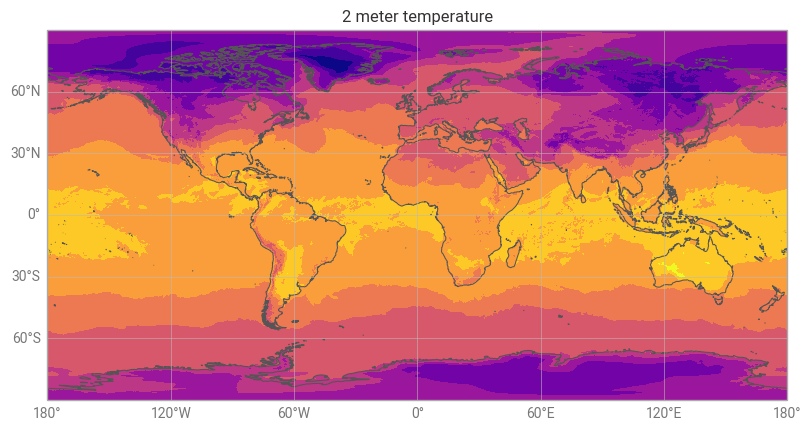

In [5]:
chart = earthkit.plots.Map(extent=[-180, 180, -90, 90])
chart.grid_cells(
    data[0],
)

chart.title("2 meter temperature")
chart.coastlines()
chart.gridlines()
chart.show()

In [7]:
out_grid = {"grid": [1,1]}

r = interpolate(data, out_grid=out_grid, method="linear")

In [8]:
r.ls()

,centre,shortName,typeOfLevel,level,dataDate,dataTime,stepRange,dataType,number,gridType
0,ecmf,2t,heightAboveGround,2,20210101,0,0,fc,None,regular_ll
1,ecmf,10u,heightAboveGround,10,20210101,0,0,fc,None,regular_ll


In [9]:
r.to_target("file", "_test.tiff")


In [11]:
ds1 = earthkit.data.from_source("file", "_test.tiff")
ds1.ls()

,variable,band
0,10 metre U wind component,1
1,2 metre temperature,2
